In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from tensorflow import keras
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
data = pd.read_csv('Data4.csv')
data.head()


C:\Users\Jason\anaconda3\envs\keras\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,STATION,NAME,DATE,AWND,AWND_Change,EVAP,MNPN,MXPN,PGTM,PRCP,...,WT06,WT08,WT09,WT11,WT13,WT16,WT17,WT18,WT19,WT22
0,USW00014607,"CARIBOU WEATHER FORECAST OFFICE, ME US",2012/1/1,8.28,0.44,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN
1,USW00014607,"CARIBOU WEATHER FORECAST OFFICE, ME US",40910,8.72,0.44,NaN,NaN,NaN,NaN,0.33,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
2,USW00014607,"CARIBOU WEATHER FORECAST OFFICE, ME US",2012/1/3,8.50,-0.22,NaN,NaN,NaN,NaN,0.00,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,USW00014607,"CARIBOU WEATHER FORECAST OFFICE, ME US",2012/1/4,7.61,-0.89,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,USW00014607,"CARIBOU WEATHER FORECAST OFFICE, ME US",2012/1/5,8.50,0.89,NaN,NaN,NaN,NaN,0.00,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [3]:
X = data.loc[:,['SN52_Change', 'SNOW_Change','SNWD_Change','AWND_Change','SX52_Change','PRCP','TMIN_Change','WDF2_Change','WDF5_Change','WSF2_Change','WSF5_Change']]
Y = data.loc[:,'TMAX']


[21:07:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "bootstrap", "criterion" } are not used.



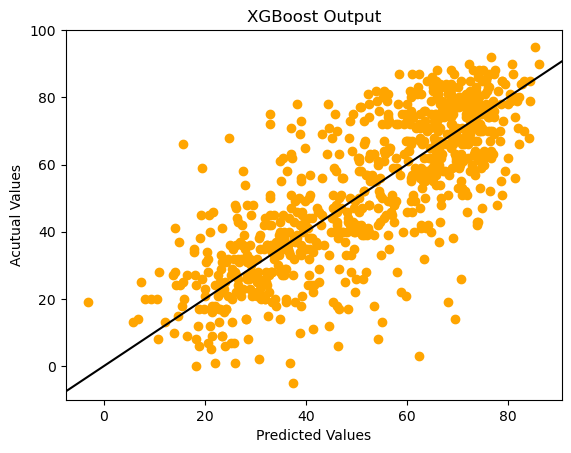

In [4]:
Xtrain, Xtest,Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 100)

mean = Xtrain.mean(axis=0)
std = Xtrain.std(axis=0)
Xtrain = (Xtrain - mean) / std 
Xtest = (Xtest - mean) / std 
model = XGBRegressor(**{'n_estimators': 500, 'criterion': 'squared_error',  'max_depth': 35, 'bootstrap': True, 'max_features': None})
model.fit(Xtrain, Ytrain)
Ypredict = model.predict(Xtest)

plt.scatter(Ypredict, Ytest, color = 'orange')
plt.xlabel('Predicted Values')
plt.ylabel('Acutual Values')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.title('XGBoost Output')

_=plt.plot([-100,100],[-100,100], color = 'black')

Text(0.5, 1.0, 'Error')

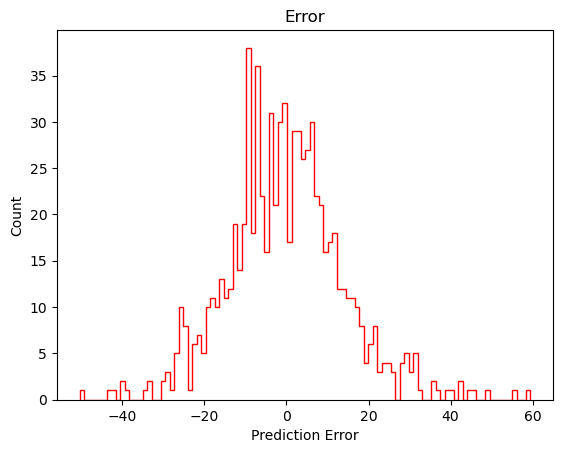

In [5]:
error = Ypredict.reshape(798,) - Ytest
plt.hist(error, bins = 100, histtype = 'step', color = 'red')
plt.xlabel("Prediction Error")
plt.ylabel("Count")
_=plt.ylabel("Count")
plt.title('Error')

In [6]:
from sklearn.metrics import r2_score
r2 = r2_score(Ytest,Ypredict)
print('R2 Score:', r2)
mse = mean_squared_error(Ytest, Ypredict)
print('Mean Squared Error:', mse)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print('Mean Absolute Error:', mae)

R2 Score: 0.597727807800547
Mean Squared Error: 198.1092070109102
Mean Absolute Error: 10.778528605188642


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


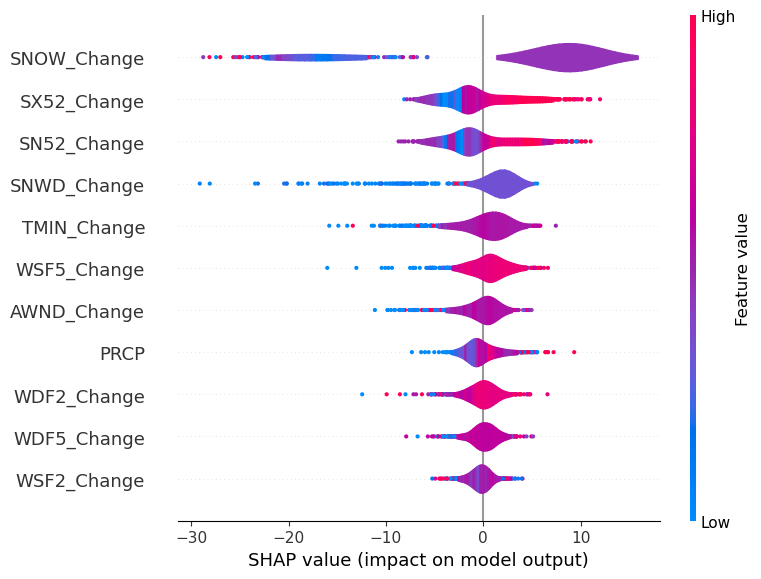

In [8]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xtest)
shap.summary_plot(shap_values, Xtest, plot_type = "violin")

In [10]:
for b in Ypredict:
    print(b)

29.208271
82.88655
33.691467
37.091892
77.15961
74.95696
67.73431
83.17778
66.60563
29.110483
62.7686
52.193813
61.83796
36.107044
68.82952
45.672073
64.58829
77.966515
26.511143
66.64457
21.452213
75.1997
56.37116
38.238228
74.17028
74.150345
55.447876
39.162186
71.14522
21.607498
52.362267
74.65797
76.495964
57.891056
33.75339
71.714775
59.288944
53.989395
51.60346
39.08341
36.81038
49.50725
30.626295
7.3295145
63.446903
79.34767
31.971043
35.40441
72.52422
51.50511
82.62359
80.10449
64.21495
37.23174
82.21192
22.046091
64.93525
68.263664
73.862724
85.38115
46.48562
50.43391
51.00451
70.99735
75.94823
54.852867
73.48218
-3.0387843
68.21471
74.859886
68.70208
60.782383
10.942708
68.17407
59.983006
60.380062
78.810074
59.483315
15.565684
62.972935
56.23686
44.34782
42.349026
24.021189
31.177057
77.493645
74.463554
61.062027
39.10438
25.202179
36.26719
65.598206
74.10693
48.56177
51.453865
37.16617
22.575573
40.351624
23.044739
56.218586
72.66553
65.78237
43.292213
51.022663
26.340212
3

In [11]:
for a in Ytest:
    print(a)

45
84
35
51
63
47
66
70
84
30
41
57
71
20
81
59
71
82
43
54
16
62
75
39
87
86
64
21
62
46
81
59
70
72
33
68
40
55
52
56
33
35
26
25
62
58
20
36
58
73
84
62
71
62
66
1
59
78
43
95
50
50
42
51
86
33
67
19
82
75
88
80
28
19
67
64
85
72
18
53
39
78
36
25
21
88
63
67
73
7
58
67
43
68
39
47
27
24
23
81
79
71
69
58
44
34
37
61
56
85
46
65
79
46
68
62
58
31
83
37
67
44
43
76
42
33
61
64
77
23
17
18
28
39
85
49
63
66
62
87
20
40
35
45
70
60
80
66
57
73
52
78
55
45
62
59
36
56
46
45
37
71
26
18
18
35
64
2
86
43
62
46
76
0
62
27
46
75
25
-5
17
79
35
22
66
24
62
75
67
41
26
21
34
81
17
21
22
79
61
36
28
74
47
43
34
71
75
13
44
76
24
20
26
57
66
74
77
72
72
23
47
61
40
26
29
79
51
20
17
45
80
28
25
35
85
83
41
68
58
49
34
25
84
67
81
40
90
53
51
77
34
57
52
71
63
63
48
62
88
7
82
38
75
44
31
28
17
72
77
70
56
74
69
55
21
83
7
90
28
42
48
11
81
32
46
57
25
57
50
5
78
48
60
43
63
71
63
78
74
18
74
37
38
31
63
80
6
37
75
31
66
57
65
25
70
77
1
18
84
41
42
58
34
12
85
80
36
73
54
35
76
79
70
42
22
51
3